# Logistic Regression for Hate Speech Detection Erick Ten Hag on Twitter

Ini adalah preprocessing, training, dan evaluation Logistic Regression model for hate speech detection.

In [10]:

# Import libraries
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


## Step 1: Load and Preprocess Data

In [11]:
# Memuat dataset (ganti 'Oversampled_Tweet_Dataset.csv' dengan path file Anda yang sebenarnya)
data = pd.read_csv('Oversampled_Tweet_Dataset.csv')

# Fungsi untuk membersihkan data teks
def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)  # Menghapus URL
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Menghapus karakter khusus dan angka
    text = text.lower()  # Mengubah teks menjadi huruf kecil
    text = text.strip()  # Menghapus spasi di awal/akhir teks
    return text

# Menerapkan preprocessing pada kolom teks
data['cleaned_text'] = data['text'].apply(preprocess_text)

# Mengubah label menjadi nilai biner ('no-hate' -> 0, 'hate' -> 1)
data['label'] = data['label'].map({'no-hate': 0, 'hate': 1})


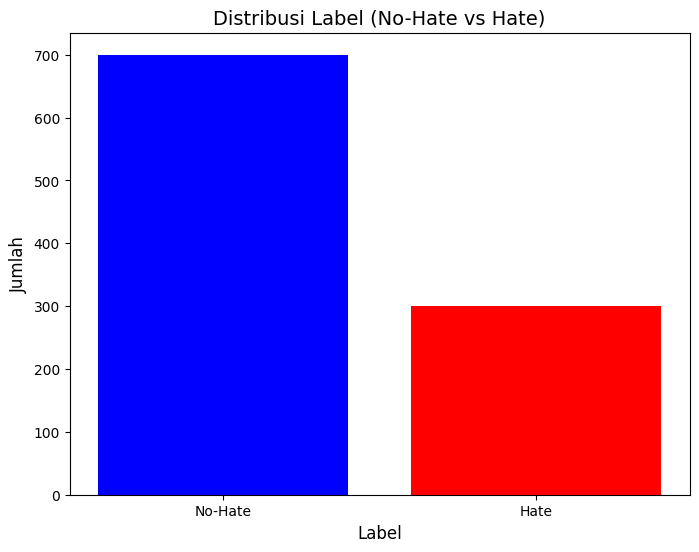

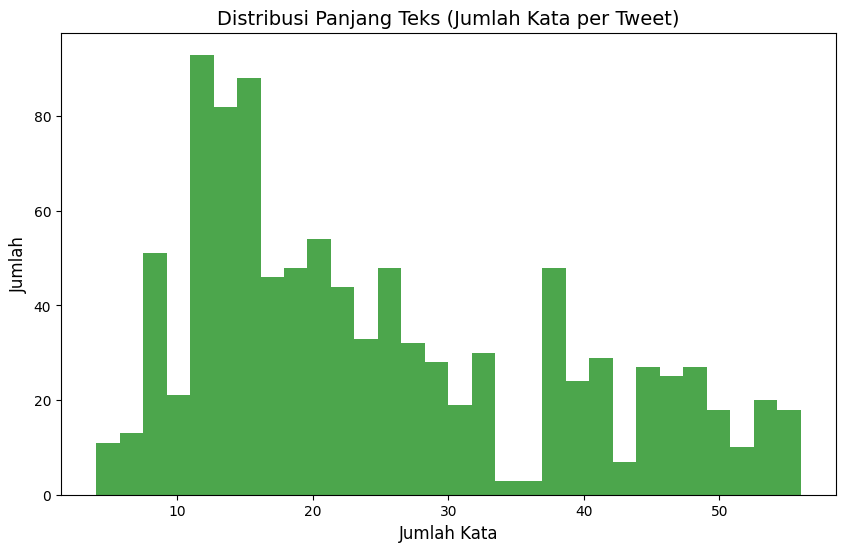

In [12]:
# Visualisasi distribusi teks yang telah dibersihkan dan label

# Distribusi label (no-hate vs hate)
label_counts = data['label'].value_counts()
label_names = ['No-Hate', 'Hate']

# Membuat plot distribusi label
plt.figure(figsize=(8, 6))
plt.bar(label_names, label_counts, color=['blue', 'red'])
plt.title('Distribusi Label (No-Hate vs Hate)', fontsize=14)
plt.ylabel('Jumlah', fontsize=12)
plt.xlabel('Label', fontsize=12)
plt.show()

# Distribusi panjang teks (jumlah kata per tweet)
text_lengths = data['cleaned_text'].apply(lambda x: len(x.split()))

# Membuat plot distribusi panjang teks
plt.figure(figsize=(10, 6))
plt.hist(text_lengths, bins=30, color='green', alpha=0.7)
plt.title('Distribusi Panjang Teks (Jumlah Kata per Tweet)', fontsize=14)
plt.xlabel('Jumlah Kata', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.show()



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Nino\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


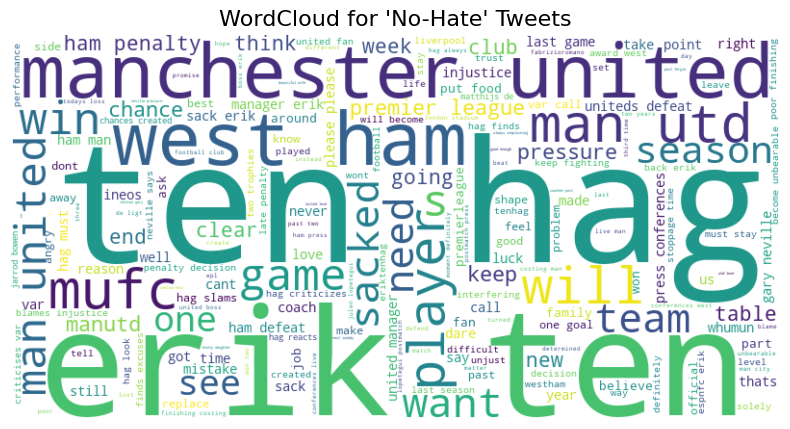

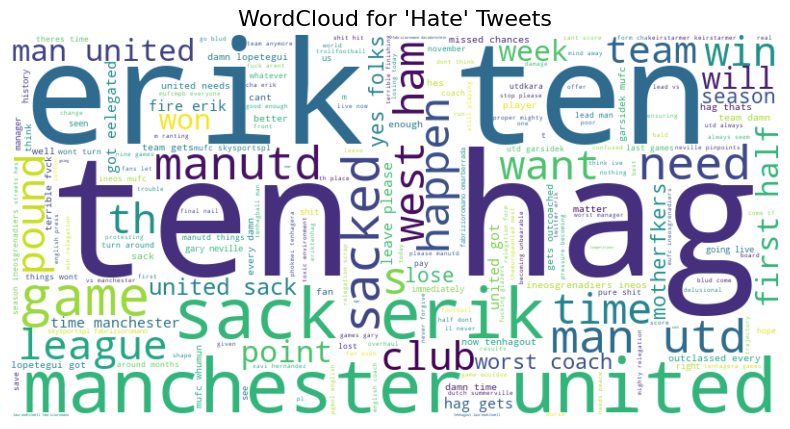

In [13]:
%pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# WordCloud for "no-hate"
no_hate_text = ' '.join(data[data['label'] == 0]['cleaned_text'])
wordcloud_no_hate = WordCloud(width=800, height=400, background_color='white').generate(no_hate_text)

# WordCloud for "hate"
hate_text = ' '.join(data[data['label'] == 1]['cleaned_text'])
wordcloud_hate = WordCloud(width=800, height=400, background_color='white').generate(hate_text)

# Plot WordCloud for "no-hate"
plt.figure(figsize=(10, 5))
plt.title("WordCloud for 'No-Hate' Tweets", fontsize=16)
plt.imshow(wordcloud_no_hate, interpolation='bilinear')
plt.axis('off')
plt.show()

# Plot WordCloud for "hate"
plt.figure(figsize=(10, 5))
plt.title("WordCloud for 'Hate' Tweets", fontsize=16)
plt.imshow(wordcloud_hate, interpolation='bilinear')
plt.axis('off')
plt.show()


## Step 2: TF-IDF Vectorization

In [14]:
# Mengonversi teks yang telah dibersihkan menjadi vektor TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Membatasi hingga 5000 fitur terpenting
X = tfidf_vectorizer.fit_transform(data['cleaned_text'])  # Fitur (TF-IDF matrix)
y = data['label']  # Label (target atau kelas)


## Step 3: Split Data into Training and Testing Sets

In [15]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## Step 4: Train Logistic Regression Model

In [16]:

# Train Logistic Regression model
model_lr = LogisticRegression(max_iter=1000, random_state=42)  # Logistic Regression
model_lr.fit(X_train, y_train)  # Train the model


LogisticRegression(max_iter=1000, random_state=42)

## Step 5: Evaluate the Model

Accuracy: 89.00%

Classification Report:
              precision    recall  f1-score   support

     no-hate       0.86      1.00      0.93       140
        hate       1.00      0.63      0.78        60

    accuracy                           0.89       200
   macro avg       0.93      0.82      0.85       200
weighted avg       0.90      0.89      0.88       200


Confusion Matrix:
[[140   0]
 [ 22  38]]


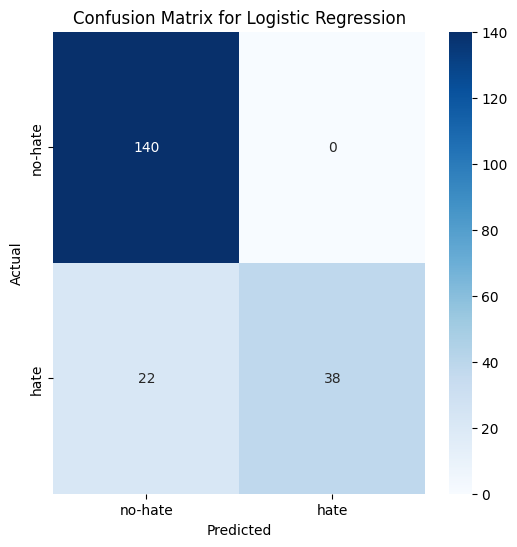

In [17]:

# Predict test data
y_pred = model_lr.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['no-hate', 'hate']))

# Confusion Matrix
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['no-hate', 'hate'], yticklabels=['no-hate', 'hate'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [18]:
import joblib

# Simpan Logistic Regression model
joblib.dump(model_lr, 'logistic_reg_model.pkl')

# Simpan TF-IDF Vectorizer
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']